# Compare Models

This notebook compares various GFW models based on the `measure_speed` and `measure_course` with each other
and with the models from Dalhousie University.  Note that the distance-to-shore cutoff was disabled in the
Dalhousie models, so none of the models compared here are using distance-to-shore as a feature.

In [1]:
from __future__ import print_function, division
%matplotlib inline
import warnings; warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML, Markdown

import vessel_scoring.models
import vessel_scoring.evaluate_model

In [2]:
data = vessel_scoring.models.load_data('../datasets')

Warning, insufficient items to sample, returning all
Warning, insufficient items to sample, returning all
Warning, insufficient items to sample, returning all
Warning, insufficient items to sample, returning all
Warning, insufficient items to sample, returning all
Warning, insufficient items to sample, returning all
Warning, insufficient items to sample, returning all


Training Logistic (MW & daylight & speed)...
Training Logistic (MW & daylight)...
Training Random Forest (MW & daylight)...
Training Logistic (SW)...
Training Logistic (MW)...
Training Random Forest...
Training Random Forest (MW & daylight & speed)...


|Model|Recall|Precision|F1-Score|
|-----|------|---------|--------|
|Logistic (MW & daylight & speed)|0.83|0.24|0.38|
|Logistic (MW & daylight)|0.79|0.22|0.35|
|Logistic (MW)|0.45|0.16|0.24|
|Logistic (SW)|0.21|0.04|0.07|
|Random Forest|0.41|0.08|0.13|
|Random Forest (MW & daylight & speed)|0.81|0.32|0.46|
|Random Forest (MW & daylight)|0.88|0.28|0.43|

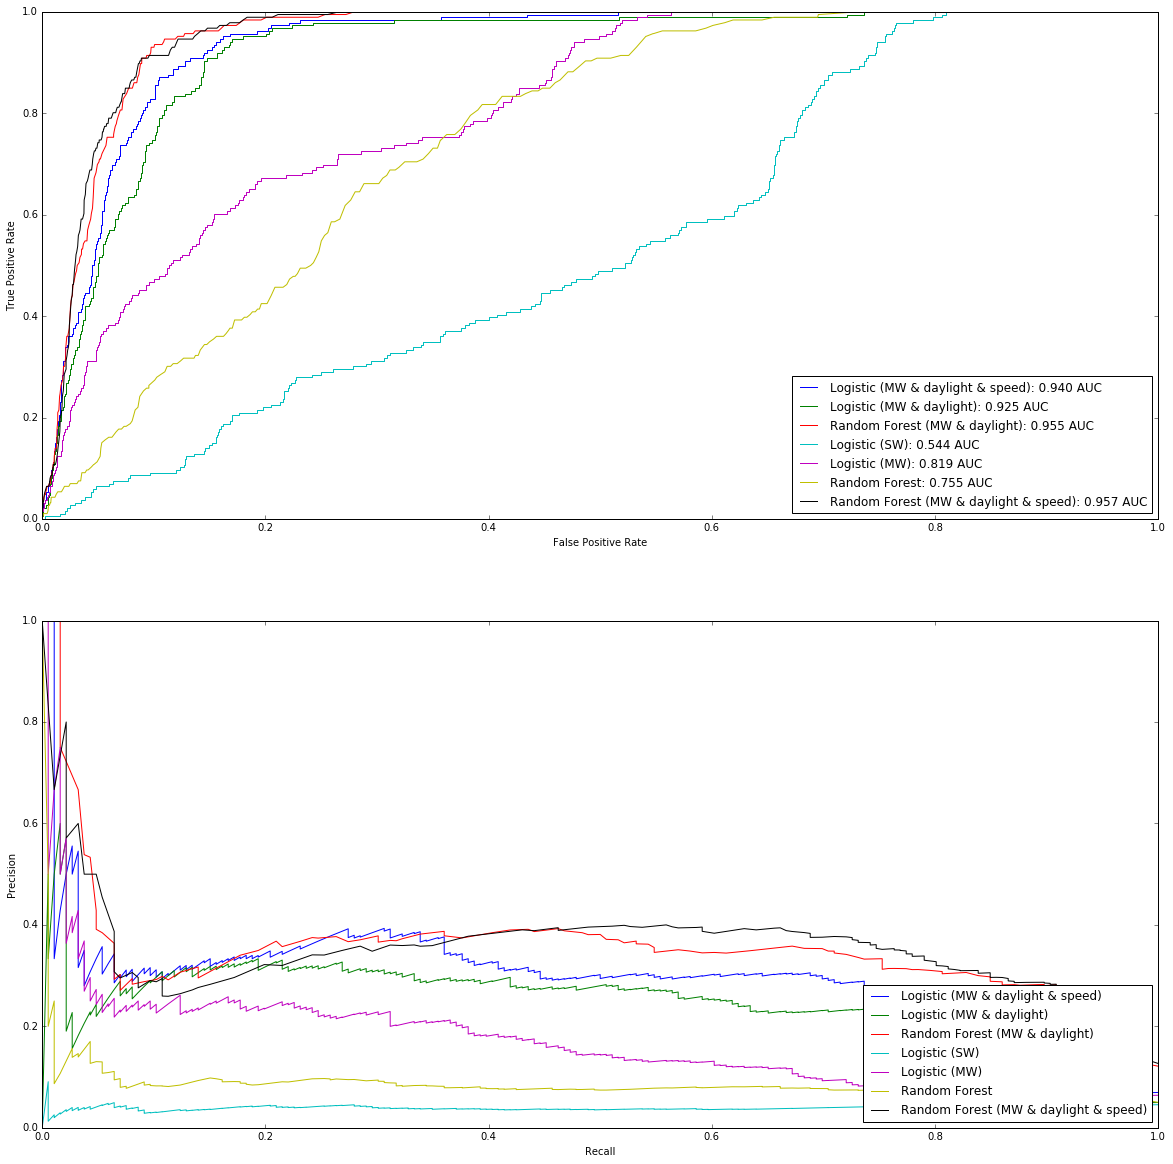

Training Logistic (MW & daylight & speed)...
Training Logistic (MW & daylight)...
Training Random Forest (MW & daylight)...
Training Logistic (SW)...
Training Logistic (MW)...
Training Random Forest...
Training Random Forest (MW & daylight & speed)...


|Model|Recall|Precision|F1-Score|
|-----|------|---------|--------|
|Logistic (MW & daylight & speed)|0.87|0.94|0.91|
|Logistic (MW & daylight)|0.87|0.94|0.91|
|Logistic (MW)|0.87|0.94|0.91|
|Logistic (SW)|0.76|0.90|0.82|
|Random Forest|0.88|0.90|0.89|
|Random Forest (MW & daylight & speed)|0.92|0.93|0.93|
|Random Forest (MW & daylight)|0.92|0.93|0.92|

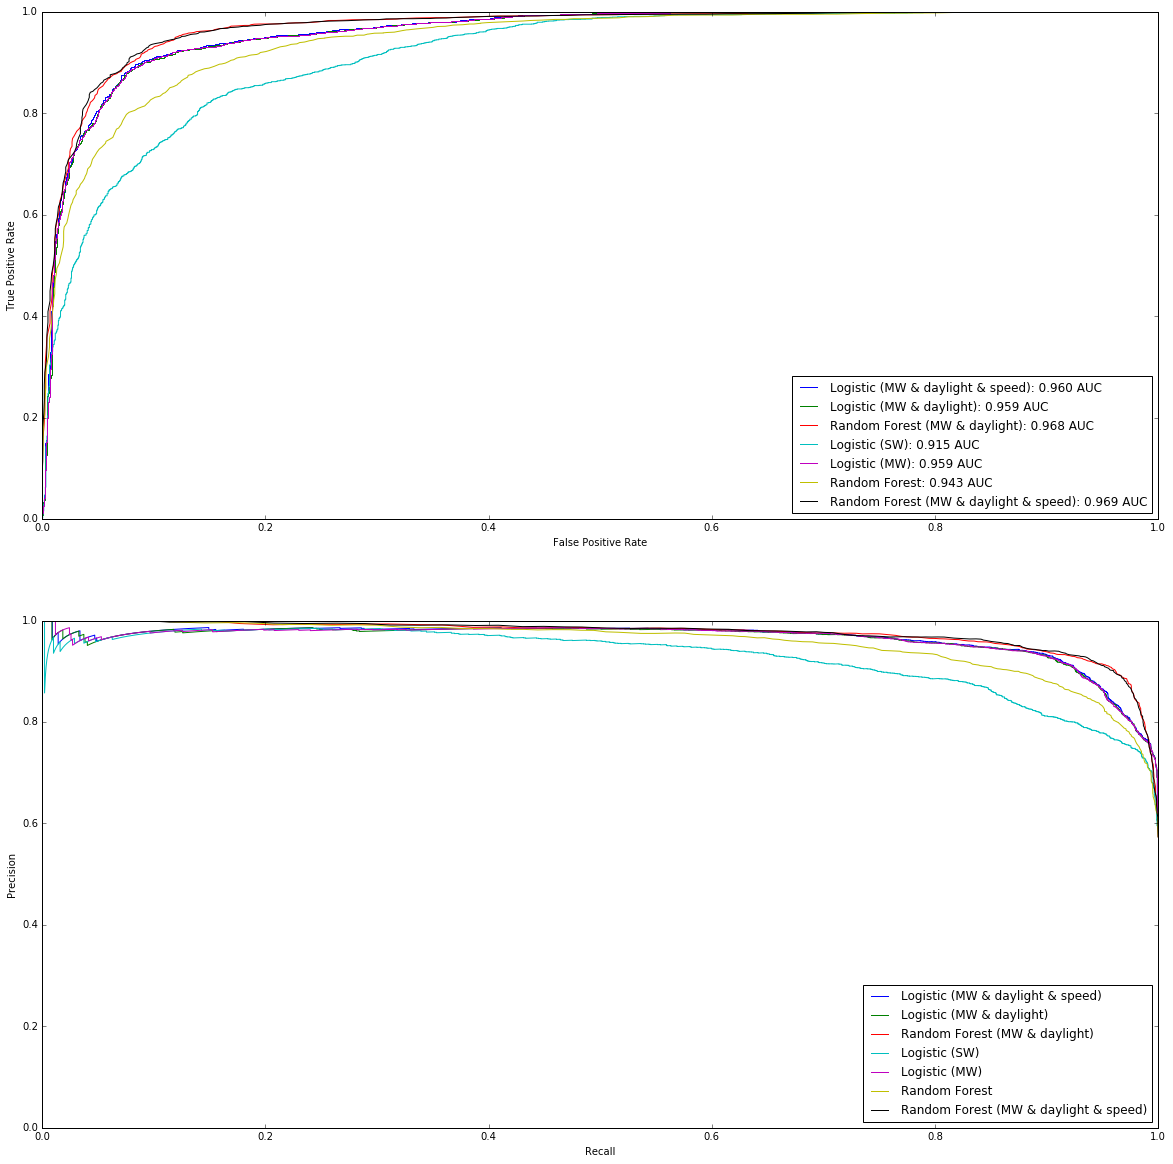

Training Logistic (MW & daylight & speed)...
Training Logistic (MW & daylight)...
Training Random Forest (MW & daylight)...
Training Logistic (SW)...
Training Logistic (MW)...
Training Random Forest...
Training Random Forest (MW & daylight & speed)...


|Model|Recall|Precision|F1-Score|
|-----|------|---------|--------|
|Logistic (MW & daylight & speed)|0.91|0.96|0.93|
|Logistic (MW & daylight)|0.91|0.96|0.93|
|Logistic (MW)|0.91|0.96|0.93|
|Logistic (SW)|0.81|0.94|0.87|
|Random Forest|0.87|0.96|0.91|
|Random Forest (MW & daylight & speed)|0.91|0.97|0.94|
|Random Forest (MW & daylight)|0.90|0.97|0.93|

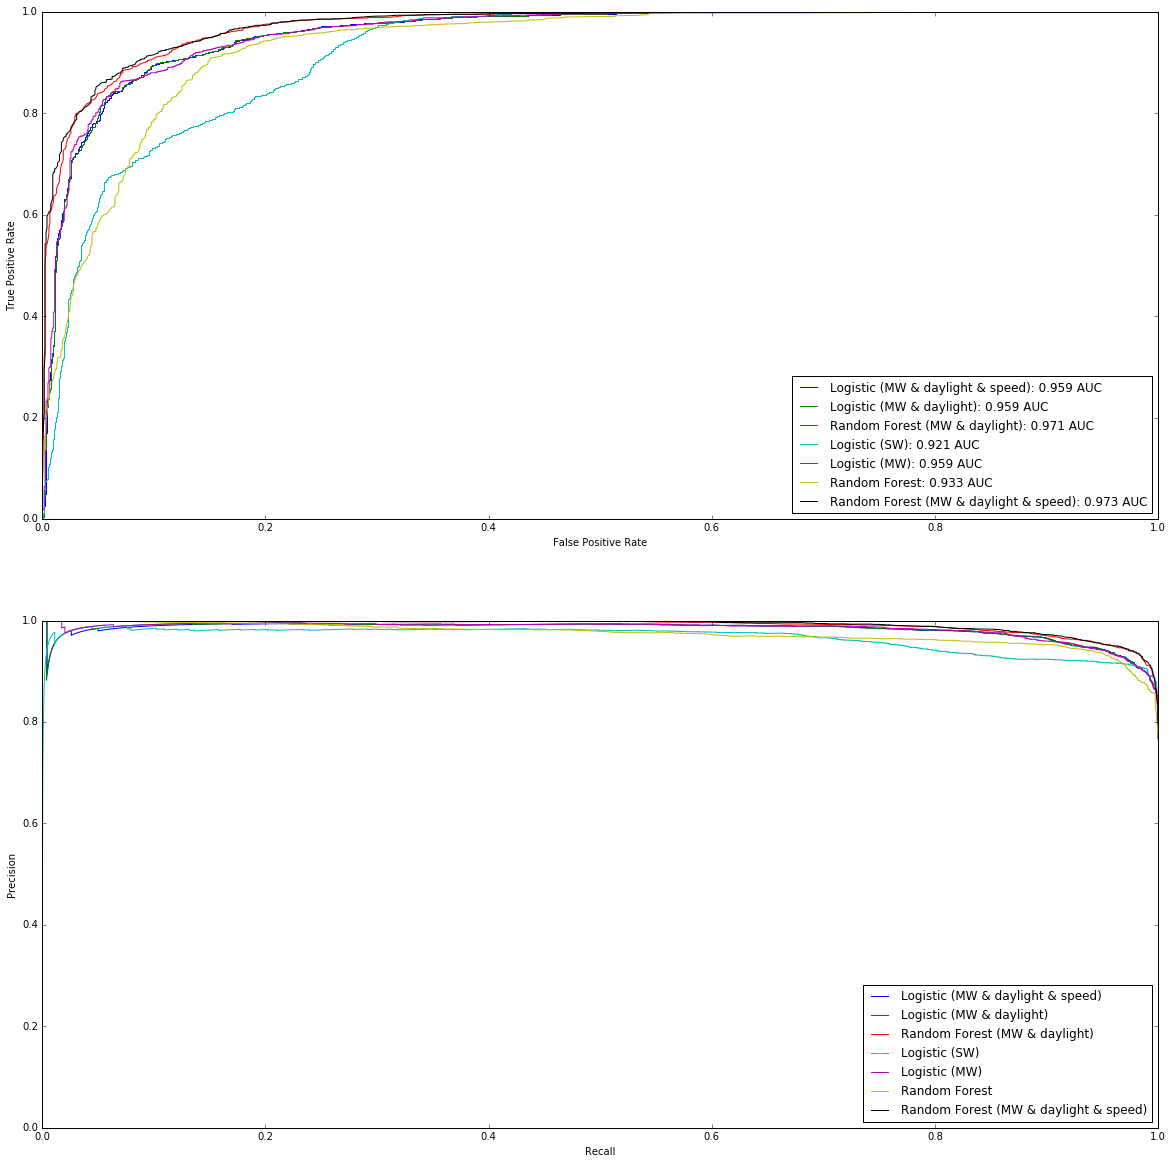

In [3]:
GEARS = {'ps': 'Purse seiners',
         'trawl': 'Trawlers',
         'longliner': 'Long liners'}

for gear, title in GEARS.iteritems():
    display(HTML("<h1>%s</h1>" % title))
        
    trained_models = [(name,
                       vessel_scoring.models.train_model(
                           name,
                           {"model": spec["model"],
                            "data": ['kristina_' + gear] + ['slow-transits'] * vessel_scoring.models.TRANSIT_WEIGHT},
                           data))
                      for (name, spec) in vessel_scoring.models.untrained_models.iteritems()
                      if spec.get("compare_models", False)]

    predictions = {}
    try:
        predictions["dal"] = vessel_scoring.evaluate_model.load_dal_predictions("../dal_{}_results.csv".format(gear))
    except IOError:
        pass
    testdata = data["kristina_" + gear]['test']
    vessel_scoring.evaluate_model.compare_models_at_cutoff(trained_models, testdata, predictions)
    vessel_scoring.evaluate_model.compare_models(trained_models, testdata)
    
    display(HTML("<hr/>"))

## Preparing Dalhouise Data 


In the `vessel-scoring` repo:

```
python scripts/make_ps_data_ready_for_dal.py
```

I disabled distshore in dal for the models that still have it using some hackery so that (a) it ran faster and (b) the comparisons were 'fair'.

Then in the `dal` repo:

```

# First, turned off distshore in the models that still have it using some hackery.

Rscript dalhouse/models/purse-seiner.R ../vessel-scoring/datasets/kristina_purse_seine.measures.from_npz.csv  ../vessel-scoring/dal_purse_seine_results.csv dalhouse/models/timeofday/

dal timothyhochberg$ Rscript dalhouse/models/trawler.R ../vessel-scoring/datasets/kristina_trawler.measures.from_npz.csv  ../vessel-scoring/dal_trawler_results.csv dalhouse/models/coastline/ data/training/trawl.csv 

Rscript dalhouse/models/purse-seiner.R ../vessel-scoring/datasets/kristina_longliner.measures.from_npz.csv  ../vessel-scoring/dal_longliner_results.csv dalhouse/models/timeofday/


```